<a href="https://colab.research.google.com/github/ahaseebai/Complete-Machine-Learning-with-Abdul-Haseeb-Memon/blob/main/04_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OUTLIER DETECTION**

In [76]:
import pandas as pd
Dataset=pd.read_csv("diagnosis.csv")
Dataset

,Diagnosis,Cholesterol Level
0,Diabetes,180
1,NaN,195
2,Hypertension,210
3,Diabetes,480
4,NaN,170
5,Cardiac,90


In [77]:
Dataset.fillna(method="bfill")

/tmp/ipython-input-1047022370.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Dataset.fillna(method="bfill")


,Diagnosis,Cholesterol Level
0,Diabetes,180
1,Hypertension,195
2,Hypertension,210
3,Diabetes,480
4,Cardiac,170
5,Cardiac,90


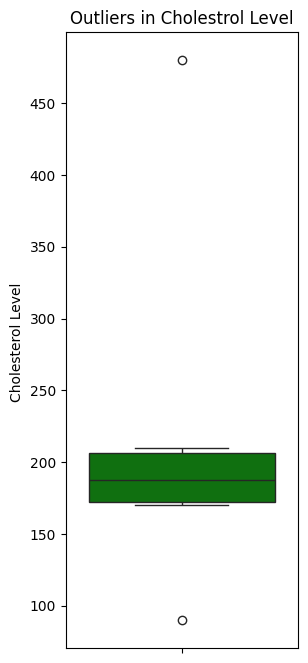

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,8))
sns.boxplot(Dataset['Cholesterol Level '] , color="green")
plt.title("Outliers in Cholestrol Level")
plt.show()

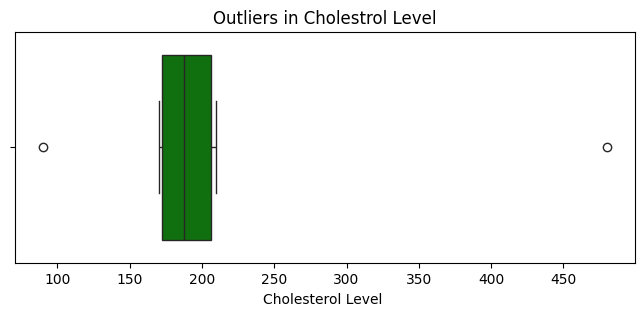

In [79]:
plt.figure(figsize=(8,3))
sns.boxplot(x=Dataset['Cholesterol Level '] , color="green")
plt.title("Outliers in Cholestrol Level")
plt.show()

# **Z-Score**

In [80]:
min_range=Dataset["Cholesterol Level "].mean()-(3*Dataset["Cholesterol Level "].std())

In [81]:
max_range=Dataset["Cholesterol Level "].mean()+(3*Dataset["Cholesterol Level "].std())

In [82]:
Dataset.shape

(6, 2)

In [83]:
new=Dataset[(Dataset["Cholesterol Level "]<=max_range) & (Dataset['Cholesterol Level ']>=min_range) ]

/tmp/ipython-input-696638400.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new['Cholesterol Level '])


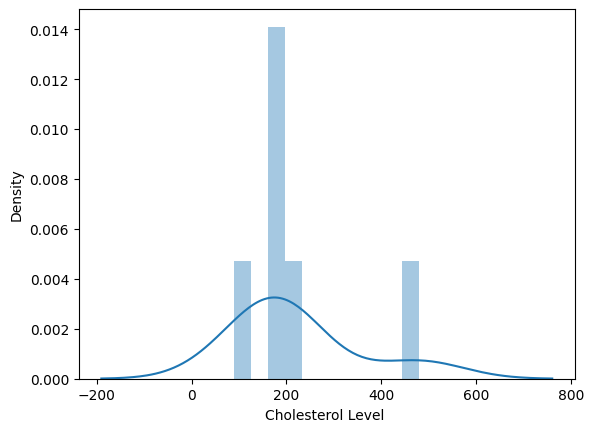

In [90]:
# sns.boxplot(x='Cholesterol Level ' , data=new)
# plt.show()
# sns.boxplot(x="Cholesterol Level ",data=_new)
# plt.show()
sns.distplot(new['Cholesterol Level '])
plt.show()

In [23]:
z_score=(Dataset["Cholesterol Level "]-Dataset['Cholesterol Level '].mean())/(Dataset['Cholesterol Level '].std())

In [26]:
Dataset["z_score"]=z_score
Dataset[Dataset["z_score"]<3]

,Diagnosis,Cholesterol Level,z_score
0,Diabetes,180,-0.305509
1,NaN,195,-0.193281
2,Hypertension,210,-0.081053
3,Diabetes,480,1.939044
4,NaN,170,-0.380327
5,Cardiac,90,-0.978875


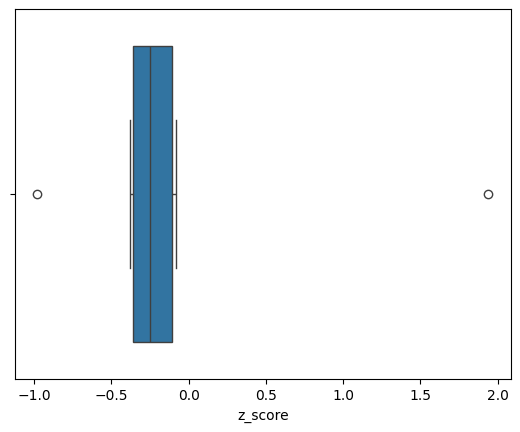

In [27]:
sns.boxplot(x=Dataset["z_score"] ,data=new)
plt.show()

# **IQR: Inter Quartile Range**

/tmp/ipython-input-3759151295.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset["Cholesterol Level "])


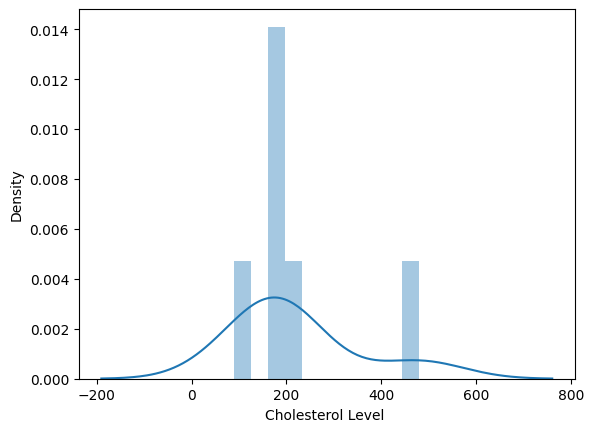

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(Dataset["Cholesterol Level "])
plt.show()

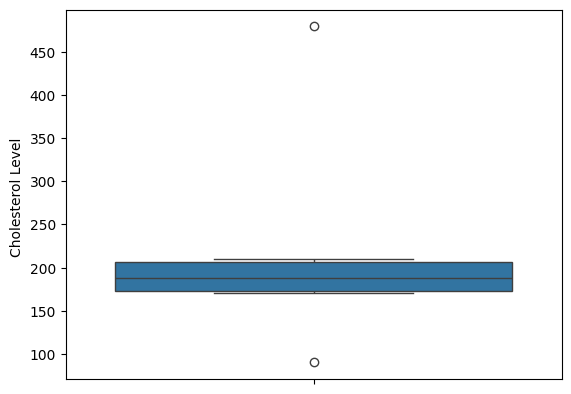

In [30]:
sns.boxplot(Dataset["Cholesterol Level "])
plt.show()



```
 Inter quartile range= q3-q1
```



In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix column name
Dataset.columns = Dataset.columns.str.strip()

# IQR method
q1 = Dataset["Cholesterol Level"].quantile(0.25)
q3 = Dataset["Cholesterol Level"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

# Remove outliers
filtered = Dataset[
    (Dataset["Cholesterol Level"] >= min_range) &
    (Dataset["Cholesterol Level"] <= max_range)
]


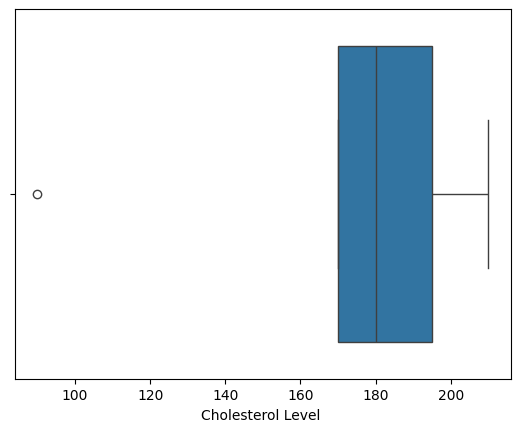

In [92]:
sns.boxplot(x="Cholesterol Level ",data=_new)
plt.show()

/tmp/ipython-input-1736118235.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered["Cholesterol Level"])


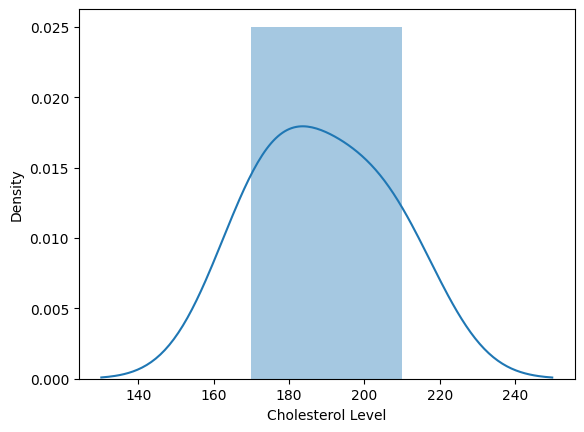

In [70]:
sns.distplot(filtered["Cholesterol Level"])
plt.show()